In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\AI\\Machine Learning\\boston-house-pricing-prediction\\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.describe(include='O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [7]:
df.dropna(inplace=True,axis=1)

In [8]:
num_cols = df.select_dtypes(exclude='O').columns.drop('median_house_value')
cat_cols = df.select_dtypes(include='O').columns

print(num_cols)
print(cat_cols)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


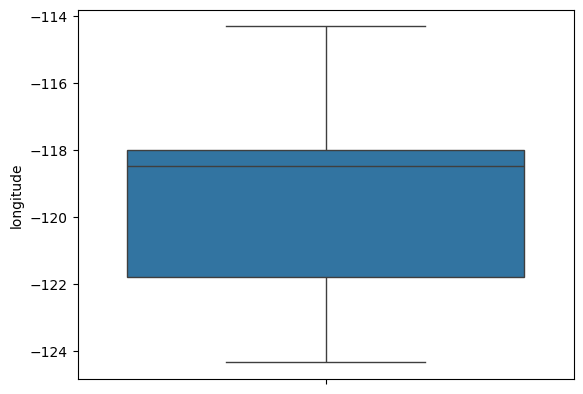

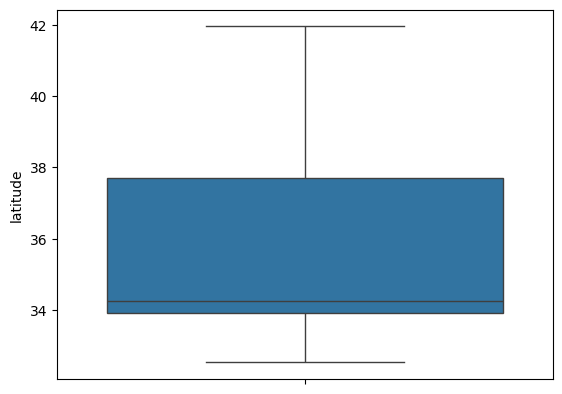

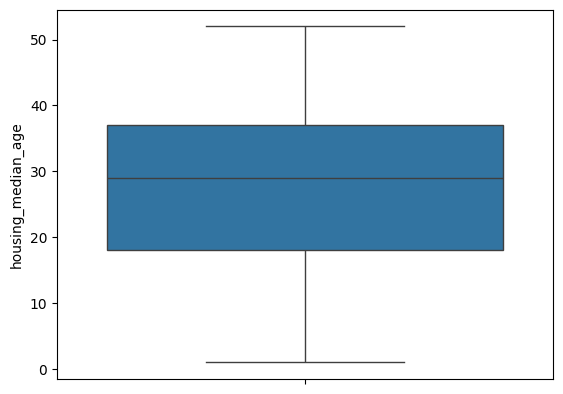

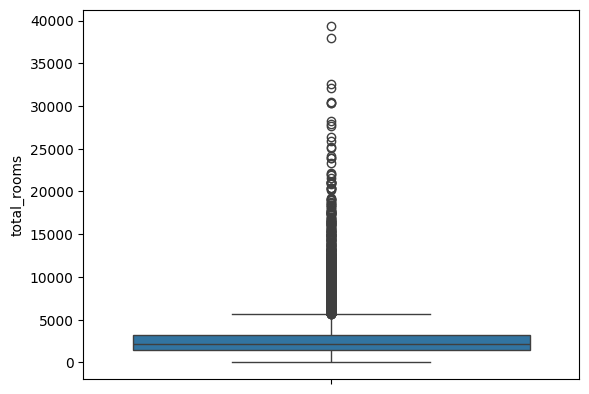

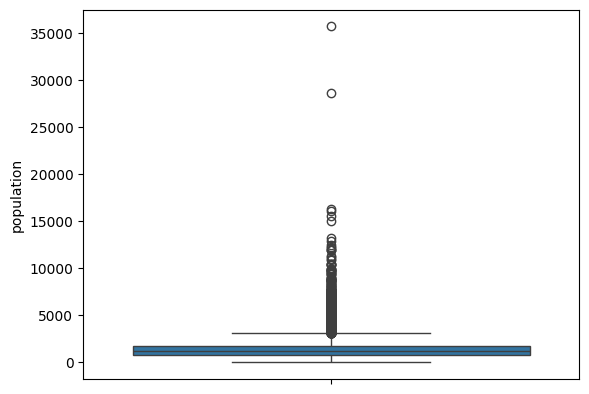

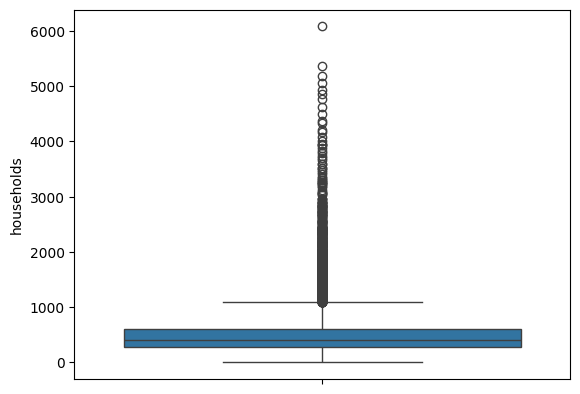

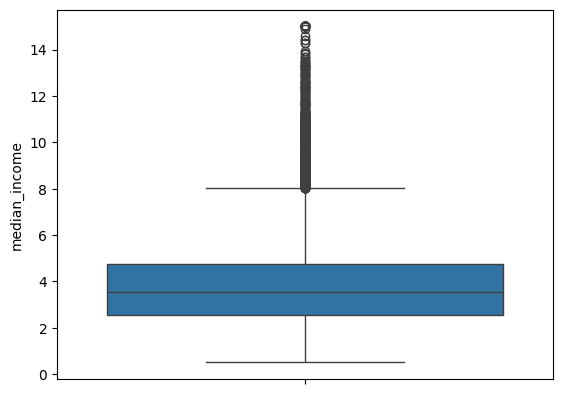

In [9]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

**Removing Outliers**

In [10]:
def remove_outliers_iqr(df):

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df


df = remove_outliers_iqr(df)

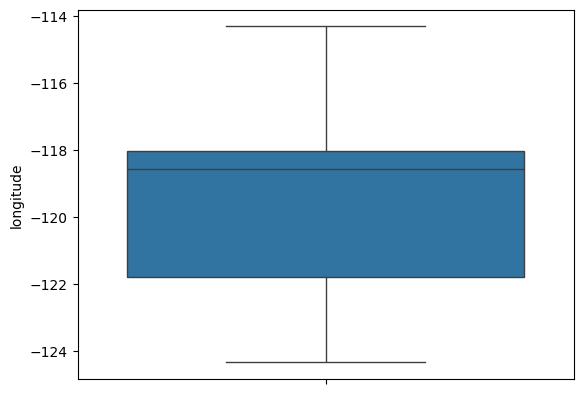

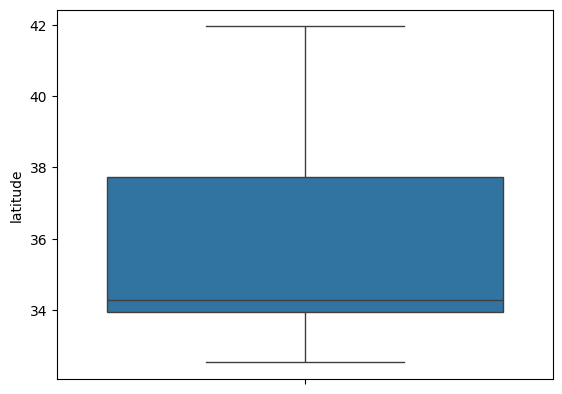

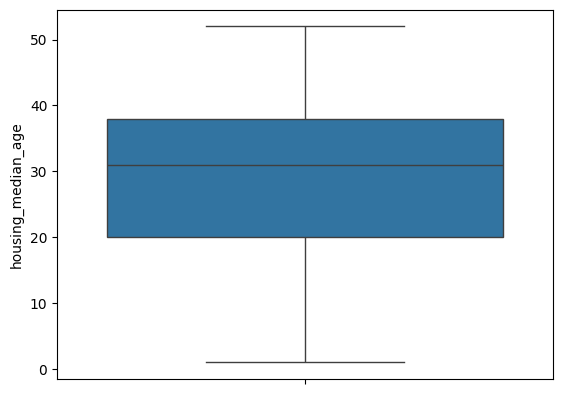

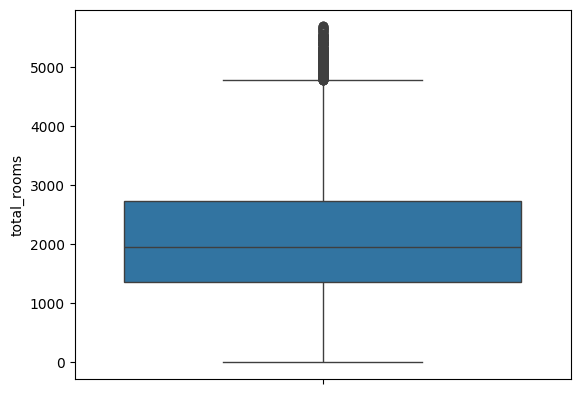

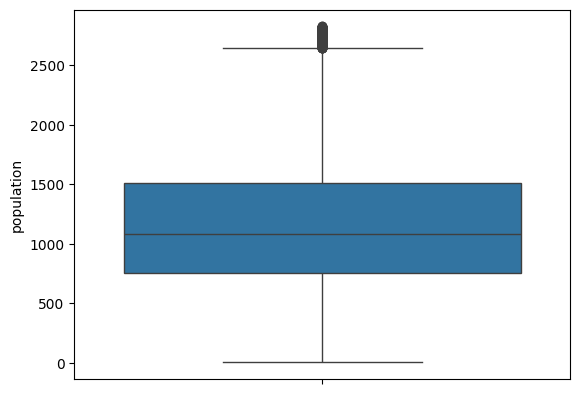

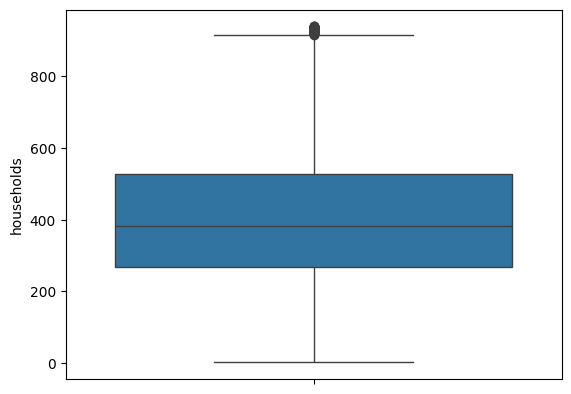

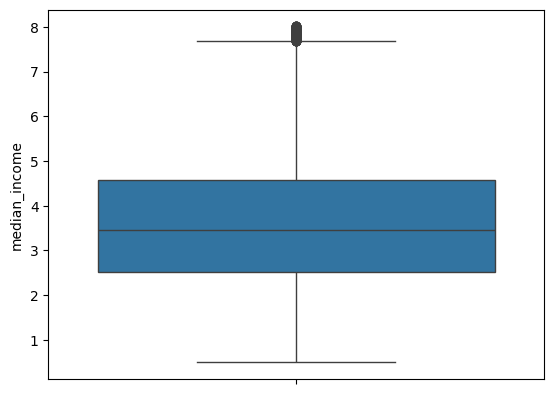

In [11]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

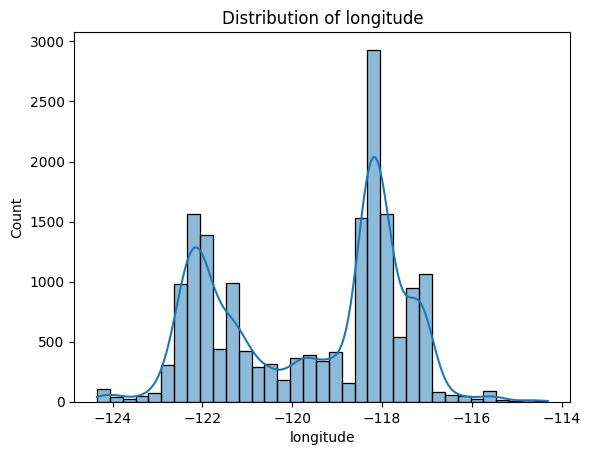

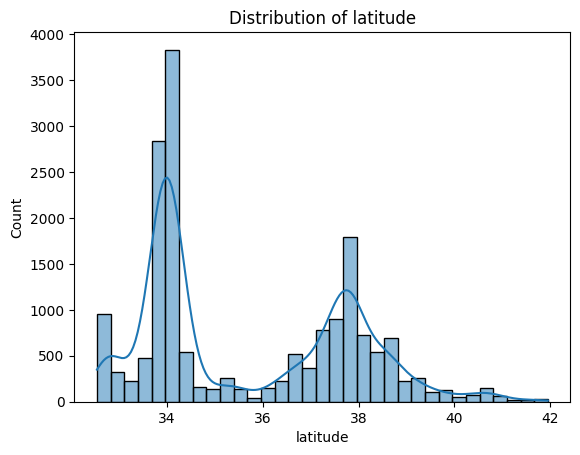

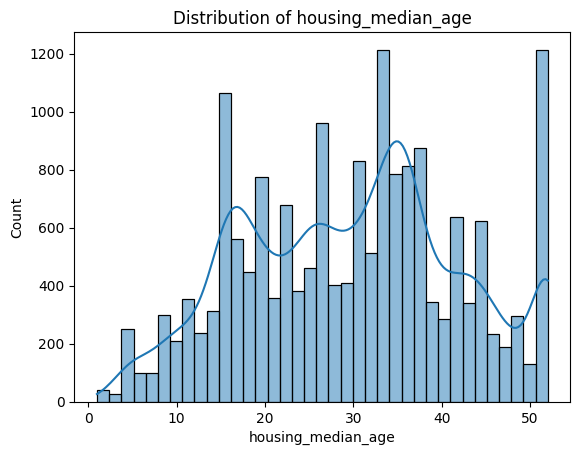

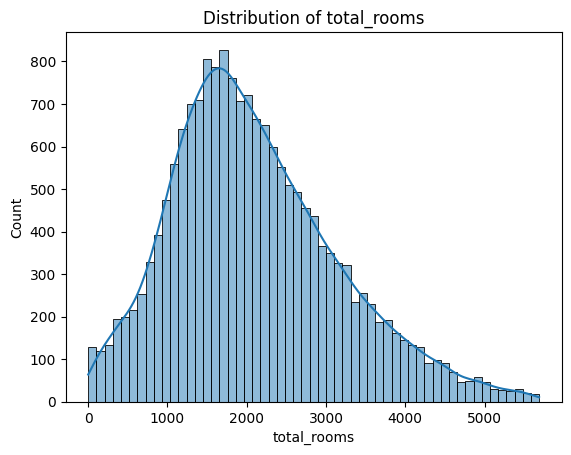

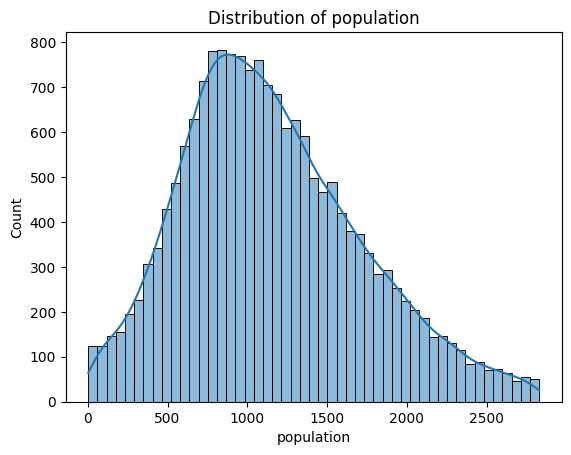

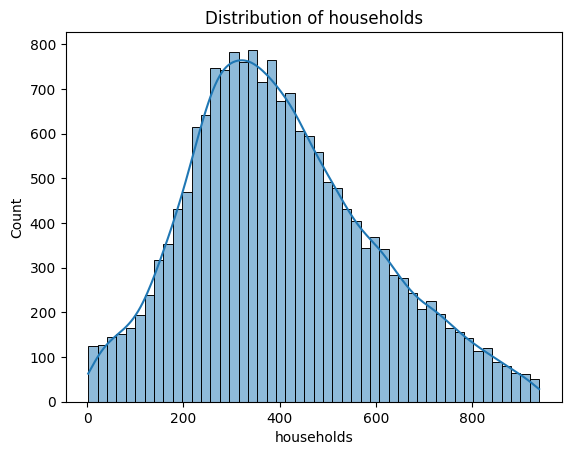

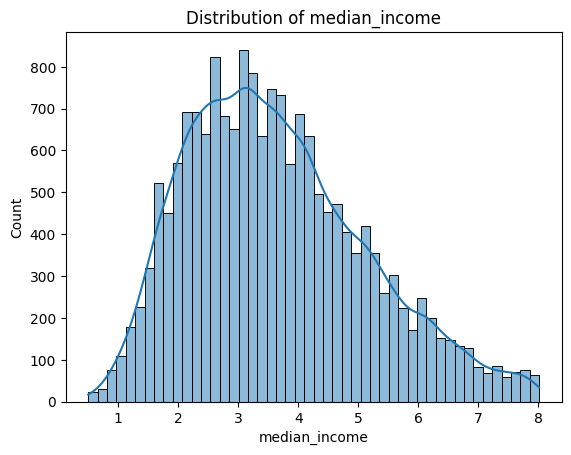

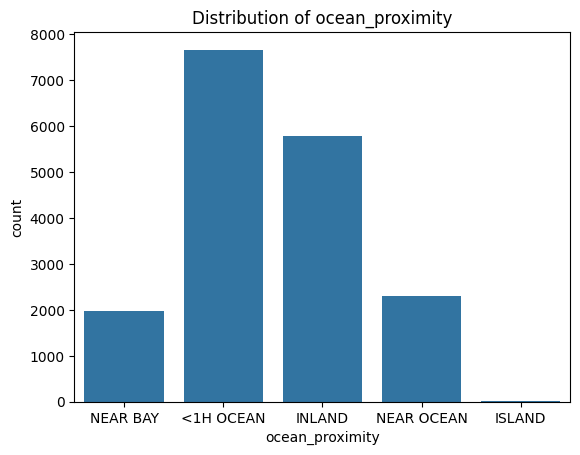

In [12]:
for col in list(num_cols) + list(cat_cols):
    if col in num_cols:  
        sns.histplot(df[col], kde=True)
    else:                 
        sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

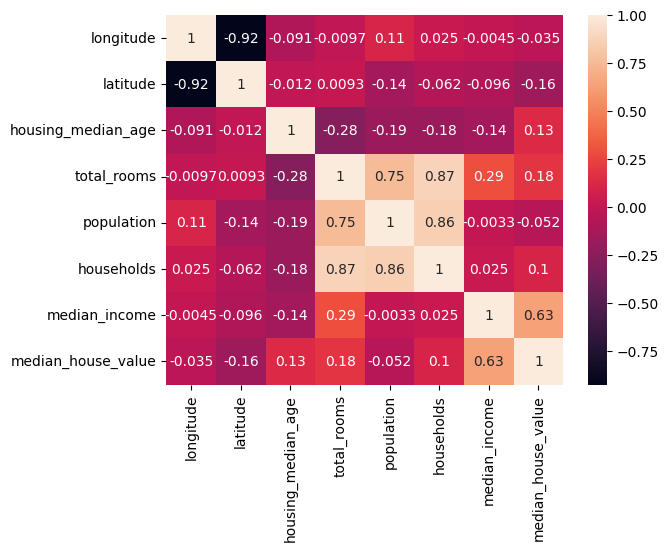

In [13]:
corr = df[df.select_dtypes(exclude='O').columns].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
df2 = df.drop(['longitude','total_rooms','households'],axis=1)
df2['rooms_per_household'] = df['total_rooms'] / df['households']


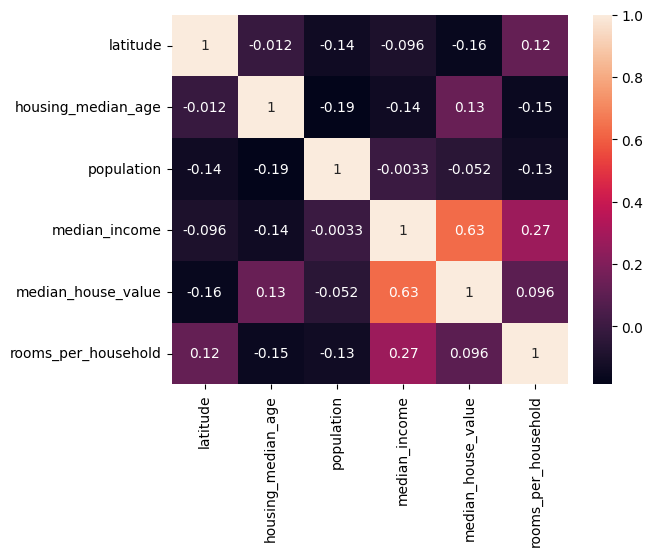

In [15]:
corr = df2[df2.select_dtypes(exclude='O').columns].corr()
sns.heatmap(corr, annot=True)
plt.show()

**median_house_value Distribution**

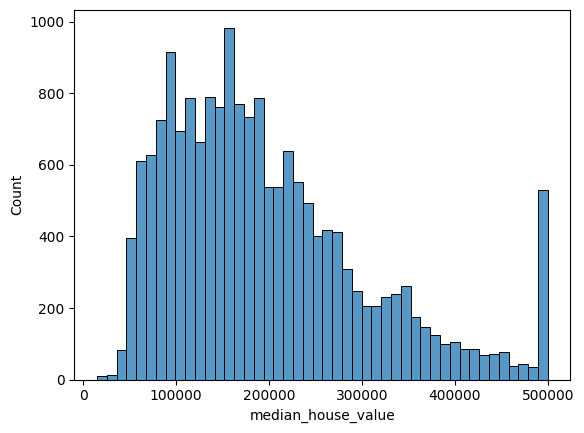

In [16]:
sns.histplot(data=df['median_house_value'])
plt.show()

# Data splitting

In [17]:
from sklearn.model_selection import train_test_split

x = df2.drop(columns=['median_house_value'],axis=1)
y = np.log1p(df2['median_house_value'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# PipeLining

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


# order = ['INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND', '<1H OCEAN']
# n = len(order)

# mapping = {cat: (i+1)/n for i, cat in enumerate(order)}

# min_val = 1/n
# df2['ocean_proximity_num'] = df2['ocean_proximity'].map(mapping).fillna(min_val)

num_cols = x_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = x_train.select_dtypes(include='O').columns.tolist()
num_pipeLine = Pipeline([
     ('poly', PolynomialFeatures(degree=2)),
     ('num_Scaler', StandardScaler())
 ])

cat_pipeLine = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False)),
    ('poly', PolynomialFeatures(degree=2)),
    ('num_Scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num_pipeLine', num_pipeLine,num_cols),
    ('cat_PipeLine', cat_pipeLine, cat_cols)
    ]
)

# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# ohe_train_arr = ohe.fit_transform(x_train[['ocean_proximity']])
# ohe_cols = ohe.get_feature_names_out(['ocean_proximity'])

# ohe_df = pd.DataFrame(ohe_train_arr, columns=ohe_cols, index=x_train.index)
# x_train = pd.concat([x_train.drop(columns=['ocean_proximity']), ohe_df], axis=1)

# ohe_test_arr = ohe.transform(x_test[['ocean_proximity']])
# ohe_test_df = pd.DataFrame(ohe_test_arr, columns=ohe_cols, index=x_test.index)
# x_test = pd.concat([x_test.drop(columns=['ocean_proximity']), ohe_test_df], axis=1)


In [40]:
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)

# Modeling

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42, n_jobs=-1)
forest.fit(x_train_prep,y_train)
print(forest.score(x_train_prep, y_train))

0.9618101008785358


In [43]:
from sklearn.metrics import r2_score

y_pred = forest.predict(x_test_prep)
print("Test R2 (sklearn.r2_score):", r2_score(y_test, y_pred))

Test R2 (sklearn.r2_score): 0.7418125440695447
